# Unit 7.4: Training Convolutional Neural Networks

## Part 3 of 5: Inspecting CIFAR-10


- Link to the dataset: https://www.cs.toronto.edu/~kriz/cifar.html

## 2) Loading the dataset

In [1]:
import lightning as L
from shared_utilities import Cifar10DataModule

L.pytorch.seed_everything(123)

dm = Cifar10DataModule(batch_size=64)
dm.prepare_data()
dm.setup()

Global seed set to 123


100%|██████████| 170498071/170498071 [02:48<00:00, 1014848.99it/s]


Extracting ./cifar-10-python.tar.gz to ./


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision

In [3]:
len(dm.train)

45000

In [4]:
len(dm.valid)

5000

In [6]:
len(dm.test)

10000

### Check label distribution

In [7]:
from collections import Counter

train_counter = Counter()
for images, labels in dm.train_dataloader():
    train_counter.update(labels.tolist())
    
print("\nTraining label distribution:")
print(sorted(train_counter.items()))

    
val_counter = Counter()
for images, labels in dm.val_dataloader():
    val_counter.update(labels.tolist())
    
print("\nValidation label distribution:")
print(sorted(val_counter.items()))
    

test_counter = Counter()
for images, labels in dm.test_dataloader():
    test_counter.update(labels.tolist())

print("\nTest label distribution:")
print(sorted(test_counter.items()))


Training label distribution:
[(0, 4513), (1, 4470), (2, 4504), (3, 4503), (4, 4509), (5, 4447), (6, 4517), (7, 4504), (8, 4506), (9, 4519)]

Validation label distribution:
[(0, 487), (1, 529), (2, 496), (3, 496), (4, 490), (5, 550), (6, 483), (7, 495), (8, 494), (9, 480)]

Test label distribution:
[(0, 1000), (1, 1000), (2, 1000), (3, 1000), (4, 1000), (5, 1000), (6, 1000), (7, 1000), (8, 1000), (9, 1000)]


## 3) Zero-rule baseline (majority class classifier)

In [8]:
majority_class = test_counter.most_common(1)[0]
print("Majority class:", majority_class[0])

baseline_acc = majority_class[1] / sum(test_counter.values())
print("Accuracy when always predicting the majority class:")
print(f"{baseline_acc:.2f} ({baseline_acc*100:.2f}%)")

Majority class: 3
Accuracy when always predicting the majority class:
0.10 (10.00%)


## 4) A quick visual check

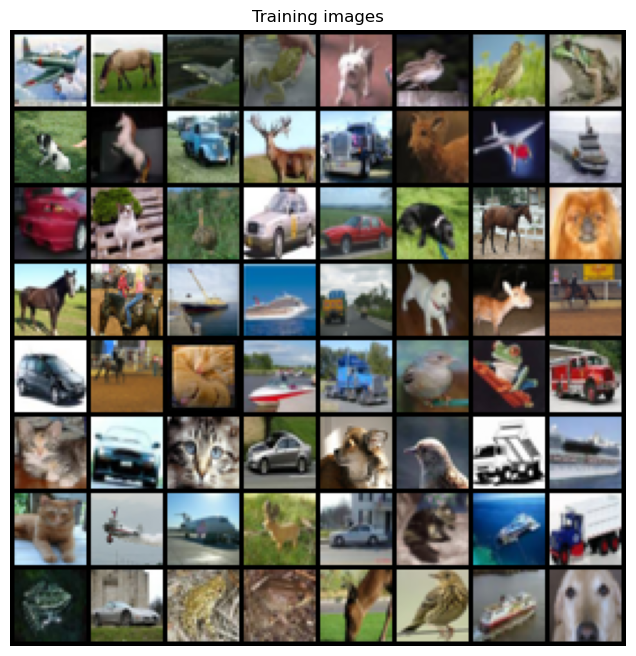

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torchvision


for images, labels in dm.train_dataloader():  
    break

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training images")
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images[:64], 
    padding=2,
    normalize=True),
    (1, 2, 0)))
plt.show()

- 0: airplane
- 1: automobile
- 2: bird
- 3: cat
- 4: deer
- 5: dog
- 6: frog
- 7: horse
- 8: ship
- 9: truck